# Transformers with Hugging Face: From Embeddings to Classification

## Visualizing Contextual Embeddings with BERT

This example uses Hugging Face's `bert-base-uncased` model to generate contextual embeddings for a quote. We tokenize the input, extract 768-dimensional embeddings, and visualize them in 2D using PCA. The plot illustrates how BERT, a Transformer model, encodes word relationships, with the `[CLS]` token providing a sequence summary.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Input Text: Artificial intelligence is the poetry of machines.
Embedding Shape: torch.Size([10, 768])
CLS Token Embedding (first 5 values): tensor([-0.1124,  0.0962, -0.3664,  0.1753, -0.6395], grad_fn=<SliceBackward0>)

Explanation:
- Shape [1, 768, 768]: 1 batch, 768 tokens (incl. [CLS], [SEP]), 768 features per token.
- CLS embedding: Contextual summary of the sequence, often used for classification tasks.


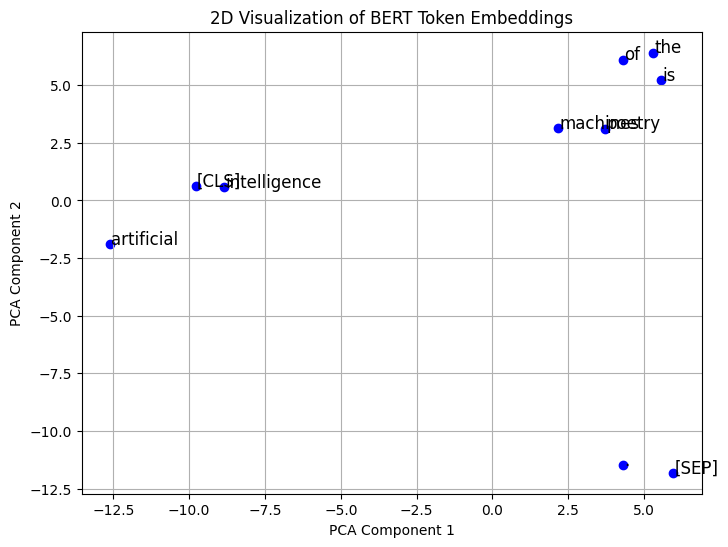

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Tokenize input
text = "Artificial intelligence is the poetry of machines."
inputs = tokenizer(text, return_tensors="pt")

# Forward pass and get embeddings
outputs = model(**inputs)
embeddings = outputs.last_hidden_state  # Shape: [1, seq_len, 768]

# Prepare embeddings for visualization (remove batch dimension)
embeddings = embeddings[0]  # Shape: [seq_len, 768]

# Get token list for labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.detach().numpy())  # Convert tensor to numpy

# Display and explain results
print(f"Input Text: {text}")
print(f"Embedding Shape: {embeddings.shape}")
print(f"CLS Token Embedding (first 5 values): {embeddings[0, :5]}")
print("\nExplanation:")
print(f"- Shape [1, {embeddings.shape[1]}, 768]: 1 batch, {embeddings.shape[1]} tokens (incl. [CLS], [SEP]), 768 features per token.")
print("- CLS embedding: Contextual summary of the sequence, often used for classification tasks.")

# Plot
plt.figure(figsize=(8, 6))
for i, token in enumerate(tokens):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color="blue")
    plt.text(embeddings_2d[i, 0] + 0.05, embeddings_2d[i, 1], token, fontsize=12)
plt.title("2D Visualization of BERT Token Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## Sentiment Classification with DistilBERT
This example classifies sentiment in sample texts using Hugging Face's `distilbert-base-uncased-finetuned-sst-2-english` model. The Transformer-based model tokenizes inputs, predicts positive or negative sentiment, and outputs confidence scores.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load pre-trained DistilBERT model fine-tuned for sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Sample texts
texts = [
    "I absolutely loved this workshop on transformers!",
    "The session was okay, but a bit too technical.",
    "This was the worst presentation I've ever attended."
]

# Process each text
for text in texts:
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():  # Inference mode
        outputs = model(**inputs)

    logits = outputs.logits  # [1, 2] tensor: [negative_score, positive_score]
    probs = F.softmax(logits, dim=-1)  # Probabilities over classes
    prediction = torch.argmax(probs, dim=-1).item()  # 1 = positive, 0 = negative

    sentiment = "positive" if prediction == 1 else "negative"
    confidence = probs[0][prediction].item() * 100

    # Additional debug info
    neg_score, pos_score = logits[0][0].item(), logits[0][1].item()

    print(f"Text: {text}")
    print(f"Sentiment: {sentiment} (Confidence: {confidence:.2f}%)")
    print(f"Raw Logits - Negative: {neg_score:.2f}, Positive: {pos_score:.2f}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Text: I absolutely loved this workshop on transformers!
Sentiment: positive (Confidence: 99.99%)
Raw Logits - Negative: -4.26, Positive: 4.57
Text: The session was okay, but a bit too technical.
Sentiment: negative (Confidence: 99.92%)
Raw Logits - Negative: 3.86, Positive: -3.22
Text: This was the worst presentation I've ever attended.
Sentiment: negative (Confidence: 99.98%)
Raw Logits - Negative: 4.70, Positive: -3.77
